In [79]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [80]:
df = pd.read_csv('./train.csv')
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [81]:
data_set = np.array(df)
m, n = data_set.shape
np.random.shuffle(data_set) 

data_dev = data_set[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

train = data_set[1000:m].T
Y_train = train[0]
X_train = train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

print(X_train.shape)

(784, 41000)


In [ ]:
def init_params():
    W1 = np.random.rand(10, 784) -0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) -0.5
    b2 = np.random.rand(10, 1) - 0.5
    W3 = np.random.rand(10, 10) - 0.5
    b3 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2, W3, b3

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z - np.max(Z, axis=0, keepdims=True)) / np.sum(np.exp(Z - np.max(Z, axis=0, keepdims=True)), axis=0, keepdims=True)
    return A
    
def ReLU_deriv(Z):
     return (Z > 0).astype(float)

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def forward_prop(W1, b1, W2, b2, W3, b3, X):
    Z1 = W1.dot(X) + b1 # (10, 784)W1 * (784, 41000)X + b1 = (10, 41000) + 41000 * (10, 1)b1 (broadcasting)
    A1 = ReLU(Z1) 
    Z2 = W2.dot(A1) + b2 # (10, 10)W2 * (10, 41000)Z1 + b2 = (10, 41000) + 41000 * (10, 1)b2 (broadcasting)
    A2 = ReLU(Z2) # doesnt change the shape
    Z3 = W3.dot(A2) + b3
    A3 = softmax(Z3)
    return Z1, A1, Z2, A2, Z3, A3

def backward_prop(Z1, A1, Z2, A2, Z3, A3, W1, W2, W3, X, Y):
    one_hot_Y = one_hot(Y)  
    dZ3 = A3 - one_hot_Y
    dW3 = 1 / m * dZ3.dot(A2.T)
    db3 = 1 / m * np.sum(dZ3, axis=1, keepdims=True)
    dZ2 = W3.T.dot(dZ3) * ReLU_deriv(Z2)
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)  
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1, axis=1, keepdims=True)

    return dW1, db1, dW2, db2, dW3, db3


def update_params(W1, b1, W2, b2, W3, b3, dW1, db1, dW2, db2, dW3, db3, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2 
    W3 = W3 - alpha * dW3  
    b3 = b3 - alpha * db3   
    return W1, b1, W2, b2, W3, b3

In [83]:
def predict(A3):
    return np.argmax(A3, 0)

def accuracy(predictions, Y):
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, iterations, alpha):
    W1, b1, W2, b2, W3, b3 = init_params()
    accuracy_list = []
    for i in range(iterations):
        Z1, A1, Z2, A2 , Z3, A3 = forward_prop(W1, b1, W2, b2, W3, b3, X)
        dW1, db1, dW2, db2, dW3, db3 = backward_prop(Z1, A1, Z2, A2, Z3, A3, W1, W2, W3,  X, Y)
        W1, b1, W2, b2, W3, b3 = update_params(W1, b1, W2, b2, W3, b3, dW1, db1, dW2, db2, dW3, db3, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = predict(A3)
            print(accuracy(predictions, Y))
            acc = accuracy(predictions, Y)
            accuracy_list.append(acc)
            
    plt.plot(range(0, iterations, 10), accuracy_list)
    plt.xlabel("Iterations")
    plt.ylabel("Accuracy")
    plt.title("Accuracy over Iterations")
    plt.show()
    
    return W1, b1, W2, b2, W3, b3

Iteration:  0
0.09758536585365854
Iteration:  10
0.3627073170731707
Iteration:  20
0.3601951219512195
Iteration:  30
0.45651219512195124
Iteration:  40
0.49485365853658536
Iteration:  50
0.5813170731707317
Iteration:  60
0.626219512195122
Iteration:  70
0.6906097560975609
Iteration:  80
0.7475365853658537
Iteration:  90
0.7846829268292683
Iteration:  100
0.7803170731707317
Iteration:  110
0.8121219512195123
Iteration:  120
0.8210975609756097
Iteration:  130
0.8145365853658536
Iteration:  140
0.8134146341463414
Iteration:  150
0.8613414634146341
Iteration:  160
0.8463414634146341
Iteration:  170
0.8667560975609756
Iteration:  180
0.815
Iteration:  190
0.8739268292682927
Iteration:  200
0.866780487804878
Iteration:  210
0.8858048780487805
Iteration:  220
0.8838292682926829
Iteration:  230
0.8815365853658537
Iteration:  240
0.8908048780487805
Iteration:  250
0.8836585365853659
Iteration:  260
0.8861707317073171
Iteration:  270
0.8929024390243903
Iteration:  280
0.8863414634146342
Iteratio

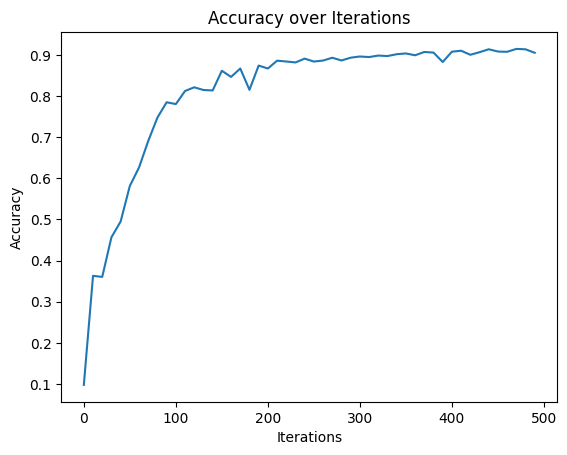

In [95]:
W1, b1, W2, b2, W3, b3 = gradient_descent(X_train, Y_train, 500, 0.7)

In [87]:
def response(X, W1, b1, W2, b2, W3, b3):
    Z1, A1, Z2, A2, Z3, A3 = forward_prop(W1, b1, W2, b2, W3, b3, X)
    predictions = predict(A3)
    return predictions

def test(index, W1, b1, W2, b2, W3, b3):
    current_image = X_train[:, index, None]
    prediction = response(X_train[:, index, None], W1, b1, W2, b2, W3, b3)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [3]
Label:  3


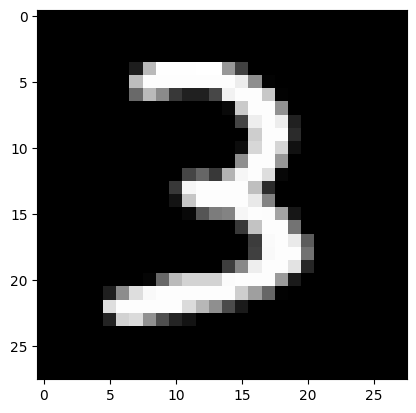

Prediction:  [8]
Label:  8


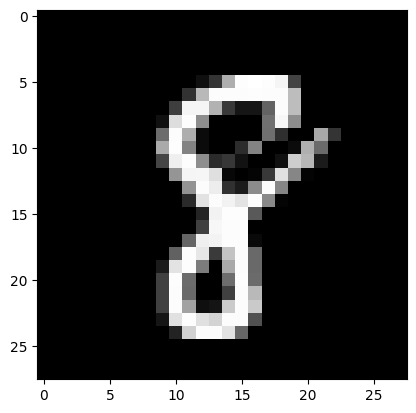

Prediction:  [0]
Label:  0


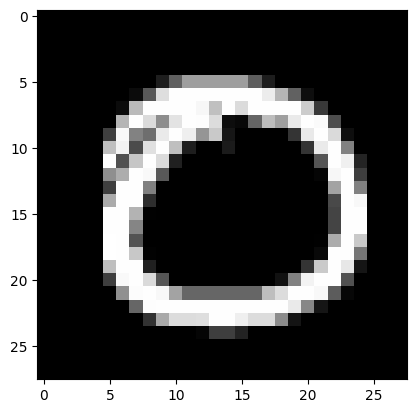

Prediction:  [1]
Label:  1


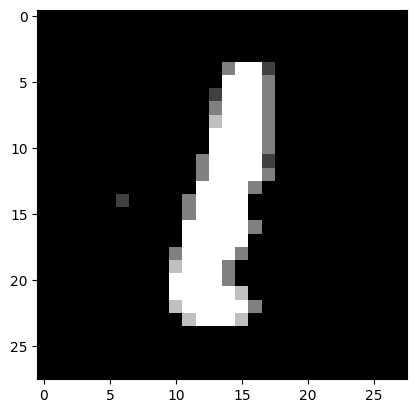

In [91]:
test(20, W1, b1, W2, b2, W3, b3)
test(21, W1, b1, W2, b2, W3, b3)
test(22, W1, b1, W2, b2, W3, b3)
test(72, W1, b1, W2, b2, W3, b3)

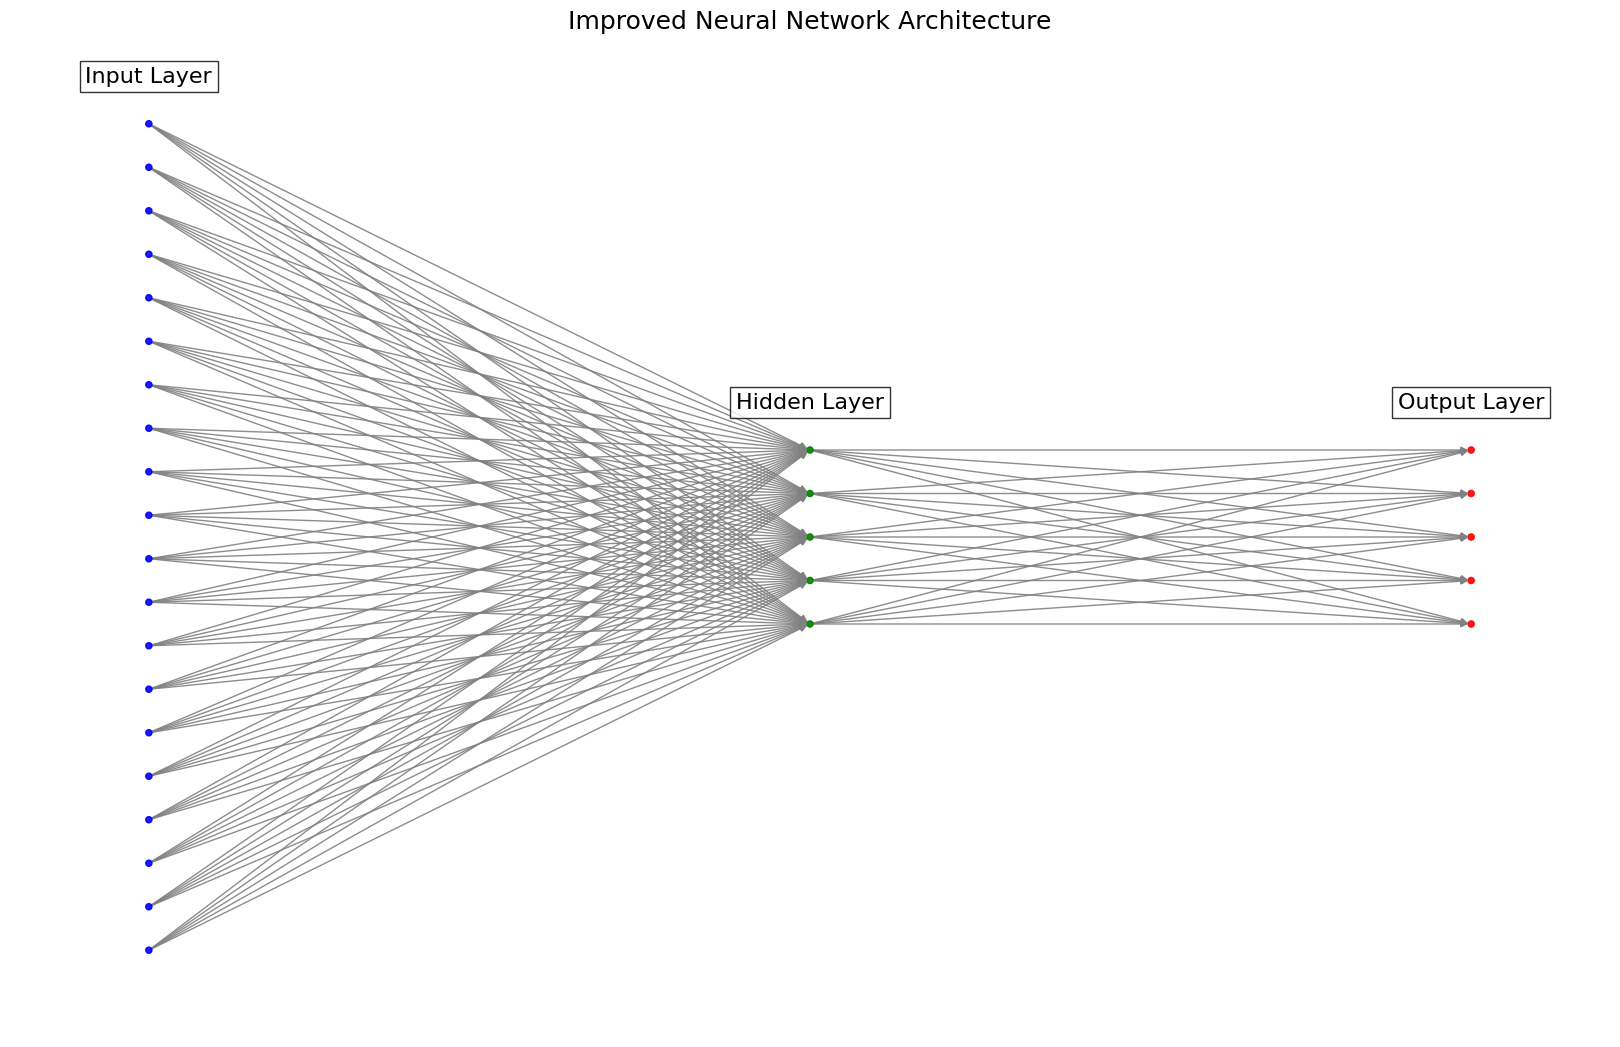

In [ ]:
# import matplotlib.pyplot as plt
# import networkx as nx

# def plot_network():
#     G = nx.DiGraph()
    
#     # Add nodes with layer attributes
#     input_nodes = [f"In_{i}" for i in range(20)]
#     hidden_nodes = [f"Hid_{i}" for i in range(5)]
#     output_nodes = [f"Out_{i}" for i in range(5)]
    
#     for node in input_nodes:
#         G.add_node(node, layer=0, color="blue")
#     for node in hidden_nodes:
#         G.add_node(node, layer=1, color="green")
#     for node in output_nodes:
#         G.add_node(node, layer=2, color="red")
    
#     # Add edges from input to hidden
#     for node_in in input_nodes:
#         for node_hid in hidden_nodes:
#             G.add_edge(node_in, node_hid)
    
#     # Add edges from hidden to output
#     for node_hid in hidden_nodes:
#         for node_out in output_nodes:
#             G.add_edge(node_hid, node_out)
    
#     # Plot the network using layers
#     pos = nx.multipartite_layout(G, subset_key="layer")
#     colors = [G.nodes[node]["color"] for node in G.nodes]
    
#     plt.figure(figsize=(16, 10))
#     nx.draw(
#         G, pos, with_labels=False, node_size=20, edge_color="gray", node_color=colors, alpha=0.9
#     )
    
#     # Add labels for layers
#     layer_labels = {
#         0: "Input Layer",
#         1: "Hidden Layer",
#         2: "Output Layer"
#     }
#     for layer, label in layer_labels.items():
#         x_values = [pos[node][0] for node in G.nodes if G.nodes[node]["layer"] == layer]
#         y_values = [pos[node][1] for node in G.nodes if G.nodes[node]["layer"] == layer]
#         plt.text(
#             sum(x_values) / len(x_values),
#             max(y_values) + 0.1,
#             label,
#             fontsize=16,
#             ha="center",
#             bbox=dict(facecolor="white", alpha=0.8, edgecolor="black"),
#         )
    
#     plt.title("Improved Neural Network Architecture", fontsize=18)
#     plt.axis("off")
#     plt.show()

# plot_network()
